# PART 1b
## Shahwaiz
----
## Goal

Your goal in this assigment is to implement and refresh the multivariate concepts learned during the previous weeks using the Python language. This will not only solidify your Python understanding but also give you strong footing for further advancement :)

**Note** Please note that can use *numpy and scipy* to complete the tasks. In case you need any help you can post on Piazza.

**So Lets Start**

In [15]:
# magic command to include all the necessary libraries
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [1]:
#Download the IRIS dataset
#"!" means run the bash (shell) command
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2015-03-03 17:31:57--  http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... ^C


In [6]:
#import pandas and name this namespace as pd
import pandas as pd

In [7]:
#Load data and name the columns
data=pd.read_csv('iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
print data.describe()

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   149.000000  149.000000   149.000000  149.000000
mean      5.848322    3.051007     3.774497    1.205369
std       0.828594    0.433499     1.759651    0.761292
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.400000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


In [12]:
#Code for generating data....
datalist=[] #create an empty list
# data list is a list of two elements, where index=0 contains data corresponding to petal 
# length and index=1 contains data corresponding to petal width
datalist.append(list(data['PetalLength'].dropna()))
datalist.append(list(data['PetalWidth'].dropna()))
datalist.append(list(data['SepalLength'].dropna()))
datalist.append(list(data['SepalWidth'].dropna()))

#If you want you build a numpy array from this list.

#print "PetalLength=", datalist[0]
#print "PetalWidth=", datalist[1]

#This and above code are both same...
# datalist=[0]*2#create a list of 2 elements
# datalist[0]=(list(data['PetalLength'].dropna()))
# datalist[1]=(list(data['PetalWidth'].dropna()))
#data list is a list of two elements, where index=0 contains data corresponding to petal 
# length and index=1 contains data corresponding to petal width
# print("PetalLength=", datalist[0])
# print("PetalWidth=", datalist[1])

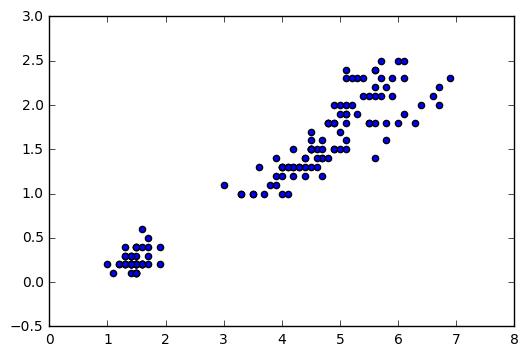

In [16]:
plt.scatter(datalist[0],datalist[1])

*In all the tasks given below use the list variable `datalist` (defined above) to answer all the questions.*

#### Task1
----------------
Lets model the petal length and width as continuous random variable $X=(x_1,x_2)$. Find the empirical mean of this random variable. Here $x_1$ specifies the petal length and $x_2$ its width.

In [23]:
#Write your code here
import copy 
mean_pl=sum(datalist[0])/len(datalist[0])
mean_pw=sum(datalist[1])/len(datalist[1])
mean_v = np.array([mean_pw,mean_pl])
print mean_v.shape

(2L,)


#### Task2
----------------
Compute the covariance matrix $X$ using outper product formula, i.e. $\Sigma=\frac{1}{n}Z^T\;Z$, where $Z$ is centered data matrix (mean = 0)

In [24]:
#Write your code here
z1=copy.copy(datalist[0])-mean_v[1]
z2=copy.copy(datalist[1])-mean_v[0]

Z=np.array( [ z1 , z2 ] )
E=np.dot( (Z)/Z.size ,Z.T)
print E 
#print E
#print np.var(datalist[0]) 

[[ 1.53779559  0.64023625]
 [ 0.64023625  0.28783794]]


In [18]:
E=np.cov(np.array([datalist[0],datalist[1] ]) )
print E

[[ 3.09637221  1.28912434]
 [ 1.28912434  0.57956557]]


[[ 1.4  1.3  1.5  1.4  1.7  1.4  1.5  1.4  1.5  1.5  1.6  1.4  1.1  1.2
   1.5  1.3  1.4  1.7  1.5  1.7  1.5  1.   1.7  1.9  1.6  1.6  1.5  1.4
   1.6  1.6  1.5  1.5  1.4  1.5  1.2  1.3  1.5  1.3  1.5  1.3  1.3  1.3
   1.6  1.9  1.4  1.6  1.4  1.5  1.4  4.7  4.5  4.9  4.   4.6  4.5  4.7
   3.3  4.6  3.9  3.5  4.2  4.   4.7  3.6  4.4  4.5  4.1  4.5  3.9  4.8  4.
   4.9  4.7  4.3  4.4  4.8  5.   4.5  3.5  3.8  3.7  3.9  5.1  4.5  4.5
   4.7  4.4  4.1  4.   4.4  4.6  4.   3.3  4.2  4.2  4.2  4.3  3.   4.1  6.
   5.1  5.9  5.6  5.8  6.6  4.5  6.3  5.8  6.1  5.1  5.3  5.5  5.   5.1
   5.3  5.5  6.7  6.9  5.   5.7  4.9  6.7  4.9  5.7  6.   4.8  4.9  5.6
   5.8  6.1  6.4  5.6  5.1  5.6  6.1  5.6  5.5  4.8  5.4  5.6  5.1  5.1
   5.9  5.7  5.2  5.   5.2  5.4  5.1]
 [ 0.2  0.2  0.2  0.2  0.4  0.3  0.2  0.2  0.1  0.2  0.2  0.1  0.1  0.2
   0.4  0.4  0.3  0.3  0.3  0.2  0.4  0.2  0.5  0.2  0.2  0.4  0.2  0.2
   0.2  0.2  0.4  0.1  0.2  0.1  0.2  0.2  0.1  0.2  0.2  0.3  0.3  0.2
   0.6  0.4  0.3  

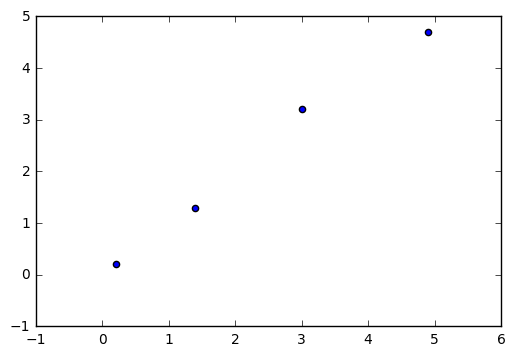

In [30]:
s=np.array(datalist)
print s
plt.scatter(s[0:50,0],s[0:50,1])

#### Task3: Multivariate Gaussian
----------------
Let's model $X$ with multivariate Gaussian. Find the probability of having flowers with petal width and height in the following range $P(3.5 < x_1 < 3.7,5.5 < x_2 <5.6)$.
Recall that 
$$f_{\mathbf x}(x_1,\ldots,x_k) = \frac{1}{\sqrt{(2\pi)^k|\boldsymbol\Sigma|}} \exp\left(-\frac{1}{2}({\mathbf x}-{\boldsymbol\mu})^\mathrm{T}{\boldsymbol\Sigma}^{-1}({\mathbf x}-{\boldsymbol\mu}) \right)$$

where ${\mathbf x}$ is a real k-dimensional column vector and $|\boldsymbol\Sigma|$ is the determinant of $\boldsymbol\Sigma$. For our this case $k=2$ 

In [ ]:
#Write your code here, you are not allowed to use scipy and numpy function here... 
###step1:find value of X vecctor x=[x1,x2]
###x1, x2 are mid point of first and second interval
###step2:find values of epsolone1 ,eps2 
###eps1=(max1-min1)/2 and eps2=(max2-min2)/2
###formula is (2*eps1)*(2*eps2)*f(X)
###here k is 2
sqrt_2pie_E= ( ((2*3.1415)**2)*(np.linalg.norm(E)) )**.5
print sqrt_2pie_E

In [ ]:
X= np.array( [ (3.5+3.7)/2.0,(5.5+5.6)/2.0  ] )
print X.shape
#norm.pdf(X)

In [ ]:
print mean_v.shape

In [ ]:
###(X-mean_v).T*inverse(E)*(X-mean_v)
print mean_v.shape
X_sub_mean=( X-mean_v )/-2

print X_sub_mean.shape
E_inv=np.linalg.inv(E)
tmp=np.dot(X_sub_mean.T,E_inv)
power = np.dot(tmp,X_sub_mean)
#print (X-mean_v).shape
print power

In [ ]:
exp_power=2.71**(power)
print exp_power

In [ ]:
f_x=(1/(sqrt_2pie_E)) * exp_power
print f_x

In [ ]:
#(3.5+3.7)/2,(5.5+5.6)/2  ]
eps1=(3.7-3.5)
eps2=(5.6-5.5)
area=(eps1)*(eps2)*(f_x)
print area

In [ ]:
from scipy.stats import norm
#Now go and use the function to find the pdf value and compares these newly computed value
#with the earlier value and compute the difference...
#print np.array([eps1,eps2]).shape
print "Prob.:",np.dot(np.array([eps1,eps2]),norm.pdf(X))

#### Task4: Multivariate Gaussian

Now consider that both the attributes are statistically independent and normally distributed then what will be the probability of $P(3.5 < x_1 < 3.7,5.5 < x_2 <5.6)$


In [ ]:
###for prob of the cont. rand var. will use the 
###formula as f(x) as given above
###integeral will be in range given [5.6,5.7]
###other approach is that:
###now if we but the 5.6 in the
def area_prob(p_l,x):
    mean_1=np.mean(p_l)
    std=np.std(p_l)
    ###we take the x as 5.7 [it can be 5.6]
    f_x_1=1/( std*( (2*3.14)**.5) )
    f_x_2=(x-mean_1)**2/(2*(std)**2)
    f_x_2=1/( 2.71828**(f_x_2) )### e=2.71
    f_x=f_x_1*f_x_2
    return f_x

In [ ]:
#############################################
###we have formula for area under curve as:
###area=2*eps*f(x)
###x is the mid point of two values given between which we
###will find the area.
###eps is diff. between these two points.
def area_under_curve(data_list,mina,maxa):
    x=(mina+maxa)/2
    eps=(maxa-mina)/2
    f_x=area_prob(data_list,x)
    return 2*eps*f_x
#############################################
 
p1=area_under_curve(datalist[1],3.5,3.7)
print "P(3.5<x 1 <3.7):",p1

 
p2=area_under_curve(datalist[0],5.5,5.6)
print "P(5.5<x 1 <5.6):",p2

In [ ]:
print "P(3.5<x 1 <3.7,5.5<x 2 <5.6)",p1*p2

#### Task5: Categorical Random Variables.
----------------
Lets categorize the petal length variable to four categories, i.e very short $\in[1,1.6]$, short $\in(1.6,4.4]$, long $\in(4.4,5.1]$, very long $\in(5.1,6.9]$ and model this varible using random variable $x$

Find the probability of this cateogrical random variable.

In [ ]:
###veryShort=[0001]
###short=[0010]
###long=[0100]
###veryLong=[1000]

#Write your code here
###petal_len_veryShort=[1,1.6],len_short=(1.6,4.4],len_long=(4.4,5.1]
###len_veryLong=(5.1,6.9]
###datalist[0]='PetalLength',datalist[1]='PetalWidth'
###datalist[2]='SepalLength',datalist[3]='SepalWidth'
def prob_n_0001(l,x1,x2):###very short
    count=0
    for i in range(0,len(l)-1):
           if( x1<=l[i]<=x2 ):
                count+=1
    return count
#########for P(1,1,1,1)
print "count(0,0,1,1)=",prob_n_0001(datalist[0],1,1.6)

In [ ]:
def prob_with_n(l,min1,max1):
    c_short=0
    for i in l:
        #print i,
        if(min1 < i <= max1):
            c_short+=1
    print c_short        
    return c_short/150.0
###############
prob_with_n(datalist[0],5.1,6.9)

In [ ]:
import numpy as np
#Write your code here
#x=np.array( 
e1=     np.array([0,0,0,1])
e2=     np.array([0,0,1,0])
e3=     np.array([0,1,0,0])
e4=    np.array([1,0,0,0])


#### Task6: Categorical Random Variables.
Find the mean and covariance matrix of categorical variable $x$.

In [ ]:
#Write your code here
##############################
#from the function above used in assignment1_a i find the folllowwing values
very_short=43
short=35
longa=37
very_long=34

p_v_s_e1 =43/150.0 
p_s_e2 =35/150.0 
p_l_e3 =37/150.0 
p_v_l_e4 =34/150.0

mean_v=np.array([  [p_v_s_e1] , [p_s_e2] , [p_l_e3] , [p_v_l_e4] ])

print mean_v

In [ ]:
P=np.diag( [ p_v_s_e1 , p_s_e2 , p_l_e3 , p_v_l_e4 ] )
print  P

In [ ]:
#####cov_matrix=P-p.pT
#####P is  adiagonal matrix having prob of each unique attribute in a feature
####means probility of e
####and p is a 4x1 matrix having element as probilily of each attr, in a feattrue
####Book Page 70. data mining by M.Zaki
print mean_v.shape
p_dot_p_T = np.dot( mean_v,mean_v.T )
cov_mat=P-p_dot_p_T
print cov_mat
#m1=np.array([  [0.3], [0.333] ,[0.287] ,[0.08] ])
#print np.dot(m1,m1.T)

#### Task7: Categorical Random Variables.

If we select 10 random flowers what will be the probability of picking 3 very short length, 2 short length, 4 long length and 1 very long petal length flowers.

In [ ]:
#Write your code here

#### Task8: Bivariate Categorical Random Variables.
----------------
Lets also categorize the petal width variable to three categories, i.e short $\in[0.1,1.0]$, medium  $\in(1.0,1.75)$, long $\in(1.75,2.5]$.

Now lets model both the petal length and width as bivariate categorical random variable $X$.
Find the probability for following cases.

$$p(x_1=[1000], x_2=[000])$$
$$p(x_1=[1000], x_2=[001])$$

$$p(x_1=[0010], x_2=[010])$$
$$p(x_1=[0001], x_2=[100])$$


In [ ]:
#Write your code here
##########################
###wid_short=[000],wid_medium=[001],wid_long=[100]
##########################
### len_long=[0001]
###len_short=[0010]
###len_veryShort=[0100]######****
###len_veryLong=[1000]
###petal_wid_short=[0.1,1.0],wid_med=(1.0,1.75),wid_long=(1.75,2.5]
###petal_len_veryShort=[1,1.6],len_short=(1.6,4.4],len_long=(4.4,5.1]
###len_veryLong=(5.1,6.9]
###datalist[0]='PetalLength',datalist[1]='PetalWidth'
###datalist[2]='SepalLength',datalist[3]='SepalWidth'
def p_1000_000(l_1,l_2,xlen_1,xlen_2,xwid_3,xwid_4):###x is len and y is wid
    count=0
    for i in range(0,len(l_1)-1):
           if( xlen_1<l_1[i]<=xlen_2 and xwid_3<=l_2[i]<=xwid_4):
                count+=1
    return count
#########for P(1,1,1,1)
print "count(1000,000)=",p_1000_000(datalist[0],datalist[1],5.1,6.9,0.1,1.0)


In [ ]:
#Write your code here
##########################
###wid_short=[000],wid_medium=[001],wid_long=[100]
##########################
### len_long=[0001]
###len_short=[0010]
###len_veryShort=[0100]######****
###len_veryLong=[1000]
###petal_wid_short=[0.1,1.0],wid_med=(1.0,1.75),wid_long=(1.75,2.5]
###petal_len_veryShort=[1,1.6],len_short=(1.6,4.4],len_long=(4.4,5.1]
###len_veryLong=(5.1,6.9]
###datalist[0]='PetalLength',datalist[1]='PetalWidth'
###datalist[2]='SepalLength',datalist[3]='SepalWidth'
def p_1000_001(l_1,l_2,xlen_1,xlen_2,xwid_3,xwid_4):###x is len and y is wid
    count=0
    for i in range(0,len(l_1)-1):
           if( xlen_1<l_1[i]<=xlen_2 and xwid_3<l_2[i]<xwid_4):
                count+=1
    return count
#########for P(1,1,1,1)
print "count(1000,001)=",p_1000_001(datalist[0],datalist[1],5.1,6.9,1.0,1.75)

In [ ]:
#Write your code here
##########################
###wid_short=[000],wid_medium=[001],wid_long=[100]
##########################
### len_long=[0001]
###len_short=[0010]
###len_veryShort=[0100]######****
###len_veryLong=[1000]
###petal_wid_short=[0.1,1.0],wid_med=(1.0,1.75),wid_long=(1.75,2.5]
###petal_len_veryShort=[1,1.6],len_short=(1.6,4.4],len_long=(4.4,5.1]
###len_veryLong=(5.1,6.9]
###datalist[0]='PetalLength',datalist[1]='PetalWidth'
###datalist[2]='SepalLength',datalist[3]='SepalWidth'
def p_0010_001(l_1,l_2,xlen_1,xlen_2,xwid_3,xwid_4):###x is len and y is wid
    count=0
    for i in range(0,len(l_1)-1):
           if( xlen_1<l_1[i]<xlen_2 and xwid_3<l_2[i]<xwid_4):
                count+=1
    return count
#########
print "count(0010,001)=",p_0010_001(datalist[0],datalist[1],1.6,4.4,1.0,1.75)

In [ ]:
#Write your code here
##########################
###wid_short=[000],wid_medium=[001],wid_long=[100]
##########################
### len_long=[0001]
###len_short=[0010]
###len_veryShort=[0100]######****
###len_veryLong=[1000]
###petal_wid_short=[0.1,1.0],wid_med=(1.0,1.75),wid_long=(1.75,2.5]
###petal_len_veryShort=[1,1.6],len_short=(1.6,4.4],len_long=(4.4,5.1]
###len_veryLong=(5.1,6.9]
###datalist[0]='PetalLength',datalist[1]='PetalWidth'
###datalist[2]='SepalLength',datalist[3]='SepalWidth'
def p_0001_100(l_1,l_2,xlen_1,xlen_2,xwid_3,xwid_4):###x is len and y is wid
    count=0
    for i in range(0,len(l_1)-1):
           if( xlen_1<=l_1[i]<=xlen_2 and xwid_3<l_2[i]<=xwid_4):
                count+=1
    return count
#########
print "count(0001,100)=",p_0001_100(datalist[0],datalist[1],4.4,5.1,1.75,2.5)

In [ ]:
print "p(x 1 =[1000],x 2 =[000]):", 0*150.0
print "p(x 1 =[1000],x 2 =[001]):", 2/150.0
print "p(x 1 =[0010],x 2 =[001]):", 22/150.0
print "p(x 1 =[0001],x 2 =[100]):", 13/150.0

In [ ]:
"""
e1_w=np.array([ 0, 0, 0])
e2_w=np.array([ 0, 0, 1])
e3_w=np.array([ 1, 0, 0])
"""


In [ ]:
###short_w_c=56,meduim_w_c=47,long_w_c=46
"""
p_short_e1_w=56/150.0
p_medium_e2_w=47/150.0
p_long_e3_w=46/150.0
print p_short_w + p_medium_w+p_long_w
"""

In [ ]:
"""
e1=     np.array([0,0,0,1])
e2=     np.array([0,0,1,0])
e3=     np.array([0,1,0,0])
e4=    np.array([1,0,0,0])
p_v_s_e1 =43/150.0 
p_s_e2 =35/150.0 
p_l_e3 =37/150.0 
p_v_l_e4 =34/150.0

print "p(x 1 =[1000],x 2 =[000]):", p_v_l_e4*p_short_e1_w
print "p(x 1 =[1000],x 2 =[001]):", p_v_l_e4*p_medium_e2_w
print "p(x 1 =[0100],x 2 =[010]):", p_l_e3*p_short_e1_w
print "p(x 1 =[0001],x 2 =[100]):", p_v_s_e1*p_long_e3_w

"""

#### Task9: Normalization
----------------
Normalize both the attributes (petal length and petal width) such that after normalization their values must lie in the interval [-2, 5]

In [ ]:
#Write your code here
import copy
def scale_norm(l,minN,maxN):
    l=(l*(maxN-minN))+minN
    return l
def normalize(l):
    min_1=min(l)
    max_1=max(l)
    range_1=max_1-min_1
    normal_l=copy.copy(l)
    normal_l=(normal_l-min_1)/range_1
    return normal_l
#######################
scale_norm(normalize(datalist[0]),-2,5)
scale_norm(normalize(datalist[1]),-2,5)

#### Task10: Class wise mean vector and covariance matrix...
Iris dataset have three different classes, now go and compute the class-wise (setosa, versicolor and virginica) mean vector and covariance matrix.

In [ ]:
#Write your code here
###we know that given data have equal distrinution of 3-classes
###so setosa=50,versicolor=50,verginica=50
p_setosa=50/150.0
p_versi=50/150.0
p_verg=50/150.0


In [ ]:
mean_v_flower=np.array([  [p_setosa] , [p_versi] , [p_verg]  ])
print mean_v_flower

In [ ]:
P_flower=np.diag( [  p_setosa, p_versi , p_verg  ] )
print  P_flower

In [ ]:
#print mean_v_flower.shape
p_dot_p_T = np.dot( mean_v_flower,mean_v_flower.T )
cov_mat=P_flower-p_dot_p_T
print "Covariance Matrix:"
print cov_mat

#### Task11: Caclulating the Probability of a flower belonging to a particular class
Using above information, lets model each class to be modeled by continuous multivariate Gaussian Random varible. Now we have recorded a flower with following attributes (sepal lenght=4, petal length=6, sepal width=4, sepal length=5.5) in the field, which class it belongs. 

In [ ]:
#Write your code here



#### Task12:  X is a normally distributed variable with mean μ = 30 and standard deviation σ = 4. Find 

a) P(x < 40)

b) P(x > 21)

c) P(30 < x < 35)

You can use scipy.stats.norm functions to answer these questions. These problems are contributed by an anonymous source.

In [ ]:
from scipy import stats

In [ ]:
#Write your code here
X_data=np.random.normal(0,1,100)

In [ ]:
stats.norm.cdf([1,90])

In [ ]:
###step:1 first we compute the Z value by using the formula as:
###Z=(X-mean)/std
###setp2:put value of Z in cdf which will be he answer
###a) P(x < 40)
Z=(40-30)/4
print stats.norm.cdf(Z)

In [ ]:
###b) P(x > 21)
Z=(21-30)/4
print 1-stats.norm.cdf(Z)

In [ ]:
#c) P(30 < x < 35)
Z=(30-30)/4
x1=1-stats.norm.cdf(Z)
Z=(35-30)/4
x2=stats.norm.cdf(Z)
print "P(30 < x < 35)=",x1*x2

#### Task13: 
The time taken to assemble a car in a certain plant is a random variable having a normal distribution with a mean of 20 hours and a standard deviation of 2 hours. What is the probability that a car can be assembled at this plant in:

a) less than 19.5 hours?

b) between 20 and 22 hours?

In [ ]:
#Write your code here
Z=(19.5-20)/2
print "a) less than 19.5 hours?:",stats.norm.cdf(Z)

In [ ]:
#c) P(20 < x < 22)
Z=(20-30)/4
x1=1-stats.norm.cdf(Z)
Z=(22-30)/4
x2=stats.norm.cdf(Z)
print "b):P(20 < x < 22)=",x1*x2

#### Task14:
A manufacturer of metal pistons finds that on average, 12% of his pistons are rejected because they are either oversized or undersized. What is the probability that a batch of 10 pistons will contain

(a) no more than 2 rejects?

(b) at least 2 rejects?

In [ ]:
#Write your code here
def comb(n,r):
    f=math.factorial
    return f(n) / ( f(r)*f(n-r) )
##########################
#(a) no more than 2 rejects?
prob_0=comb(10,0)*(.12)**0*(1-.12)**10
prob_1=comb(10,1)*(.12)**1*(1-.12)**9
prob_2=comb(10,2)*(.12)**2*(1-.12)**8
print "(a) no more than 2 rejects?:",prob_0+prob_1+prob_2

In [10]:
#(b) at least 2 rejects?
###p(x<=2)=1-p(x<=1)
print "(b) at least 2 rejects?:",1-(prob_0+prob_1)

(b) at least 2 rejects?:

NameError: name 'prob_0' is not defined